In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from scipy.io import loadmat
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
WA = r"$\textrm{W}_\mathcal{G}(\hat{\textbf{p}}_{\mathcal{H}(\mathcal{T})}, \textbf{p}^\star_{\mathcal{H}(\mathcal{T})})$"
TV = r"$\textrm{TV}(\hat{\textbf{p}}_{\mathcal{H}(\mathcal{T})}, \textbf{p}^\star_{\mathcal{H}(\mathcal{T})})$"
label_size = 22
tick_size = 20
title_size = 24
legend_size = 18

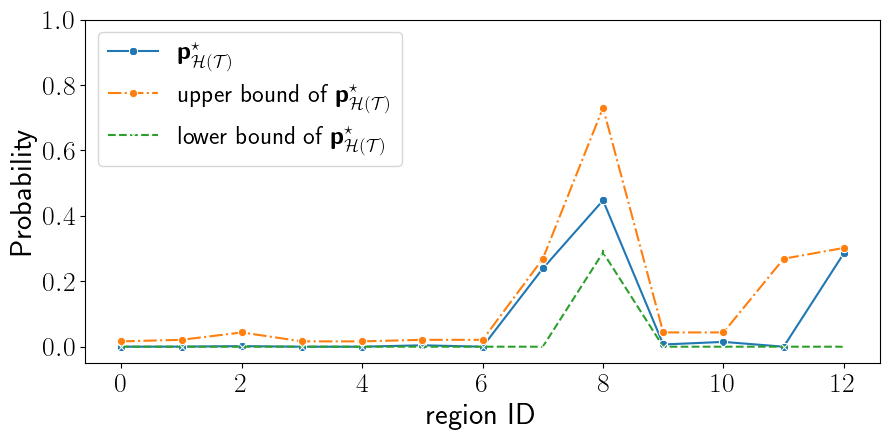

In [2]:
df = pd.read_parquet("bounds.parquet")
df = df[(df.item_seed == 0) & (df.n_p == 10000) & (df.h_seed == 0) & (df.noise == "noiseless") & (df.user_dist == "mix3gaussian") & (df.method == "least-square-graph")]

p_true = pd.DataFrame(np.vstack(df.p_true))
p_true = pd.melt(p_true, value_vars=p_true.columns)
p_lower = pd.DataFrame(np.vstack(df.p_lower))
p_lower = pd.melt(p_lower, value_vars=p_lower.columns)
p_upper = pd.DataFrame(np.vstack(df.p_upper))
p_upper = pd.melt(p_upper, value_vars=p_upper.columns)

fig, ax = plt.subplots(1, 1, figsize=(9, 4.5))
sns.lineplot(data=p_true, x="variable", y="value", err_style='bars', ax=ax,
             label=r'$\textbf{p}^\star_{\mathcal{H}(\mathcal{T})}$', marker='8', linestyle='-')
sns.lineplot(data=p_upper, x="variable", y="value", err_style='bars', ax=ax,
             label=r"upper bound of $\textbf{p}^\star_{\mathcal{H}(\mathcal{T})}$", marker='o', linestyle='-.')
sns.lineplot(data=p_lower, x="variable", y="value", err_style='bars', ax=ax,
             label=r"lower bound of $\textbf{p}^\star_{\mathcal{H}(\mathcal{T})}$", marker='x', linestyle='--')
ax.set_ylabel('Probability', fontsize=label_size)
ax.set_xlabel('region ID', fontsize=label_size)
ax.set_ylim([-0.05, 1])

ax.tick_params(axis='both', which='major', labelsize=tick_size)

plt.legend(fontsize=legend_size)
plt.tight_layout()
fig.savefig(f"fig/2d_bounds.pdf", dpi=300, format="pdf", bbox_inches="tight")
plt.show()